### Single dataset analysis

In [4]:
#from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import ast  # string of dictionary to dictionary (csv row of column to dictionary)
import pickle
from collections import Counter
#%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.stats
from numpy import sqrt
%matplotlib inline
# Visualitzarem només 3 decimals per mostra
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

import os
import warnings
import tempfile

import random
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error

import time
import numpy as np

from pandas_datareader import data
import matplotlib.pyplot

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#imbalanced dataset
import tensorflow as tf
from tensorflow import keras

# basic models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss

# ensemble models
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.feature_selection import SelectKBest


# model selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
# skopt tuning
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from lightgbm import LGBMClassifier


# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [5]:
data2014 = load_dataset('/Users/carlo/Downloads/2014.csv')
data_values = data2014.values
data2014.dataframeName = '2014.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2014.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (3788, 64)
Dimensionalitat de les entrades X (3788, 2)
Dimensionalitat de l'atribut Y (3788,)


In [1]:
# we choose Random Forest as the best model for single dataset analysis

In [7]:
features = ['Revenue', 'EPS', 'EBITDA Margin', 'returnOnEquity', 'Operating Income Growth', 'Sector']
X = data2014[features]
y = data2014['Class']

In [8]:
one_hot_X = pd.get_dummies(X)
one_hot_X.replace([np.inf, -np.inf], np.nan)
one_hot_X.fillna(0)
one_hot_X.head()

,Revenue,EPS,EBITDA Margin,returnOnEquity,Operating Income Growth,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,3.991236e+10,4.1900,0.2470,0.1664,0.0067,0,0,0,1,0,0,0,0,0,0,0
1,3.734148e+09,0.2396,0.0107,0.3294,1.9463,0,0,0,1,0,0,0,0,0,0,0
2,3.991236e+10,1.4700,0.0450,0.2821,-0.0141,0,0,0,1,0,0,0,0,0,0,0
3,2.552641e+10,4.6000,0.0420,-0.1180,0.1113,0,0,0,1,0,0,0,0,0,0,0
4,1.790960e+10,2.9000,0.2010,0.2792,0.0370,0,0,0,1,0,0,0,0,0,0,0


In [9]:
y=y.values.ravel()
print(y)

[0 0 1 ... 0 1 0]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((2841, 16), (947, 16))

In [ ]:
# X_train.drop('2015 PRICE VAR [%]', axis=1)
# X_test.drop('2015 PRICE VAR [%]', axis=1)

In [11]:
rf_model = forest_model = RandomForestRegressor(random_state=1)

In [12]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [13]:
rf_val_mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.43602531944784373


In [14]:
print(rf_model.predict(X_test))

[0.44       0.16       0.5        0.41       0.54       0.31
 0.55       0.53       0.49       0.41       0.39       0.74
 0.81       0.47       0.74       0.46       0.44       0.37
 0.02       0.36       0.49       0.72       0.37       0.53
 0.34       0.93       0.02       0.42       0.29       0.42
 0.92       0.28       0.38       0.11       0.47       0.11
 0.23       0.53       0.09       0.46       0.6        0.48
 0.32       0.43       0.57       0.79       0.33       0.48
 0.28       0.45       0.25       0.09       0.44       0.45735043
 0.53       0.43       0.58       0.15       0.51       0.2
 0.74       0.17       0.12       0.63       0.36       0.31
 0.71       0.22       0.52       0.27       0.26       0.26
 0.75       0.18666667 0.09691514 0.77       0.55       0.26
 0.34       0.31       0.44       0.84       0.09       0.28
 0.44       0.07       0.6        0.08       0.2        0.29
 0.5        0.2        0.818      0.21       0.13       0.23
 0.52       0.32   

In [15]:
results = rf_model.predict(X_test)
print(X_test)

           Revenue     EPS  EBITDA Margin  returnOnEquity  \
1580  1.347007e+10  3.0600        0.06000          0.4295   
2256  1.042190e+08  0.3800        0.64700          0.1025   
263   2.289588e+10  0.9552        0.10530          0.0572   
2922  9.811350e+08  0.6500        0.04900          0.0167   
1697  1.689200e+09  0.8100        0.14400          0.1345   
...            ...     ...            ...             ...   
1234  7.485380e+08 -2.8700        0.08000          0.0414   
227   3.573732e+09  2.0300        0.05600          0.1625   
812   5.414000e+06 -0.7900       -0.29600         -0.2355   
840   5.643770e+05 -1.7900       -7.75597         -0.3952   
555   1.750000e+05 -1.2500       -7.75597         -0.3520   

      Operating Income Growth  Sector_Basic Materials  \
1580                 0.096300                       0   
2256                 1.223800                       0   
263                  3.563666                       1   
2922                -0.512600          

In [16]:
X_train.shape, X_test.shape

((2841, 16), (947, 16))

In [17]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

In [18]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [19]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

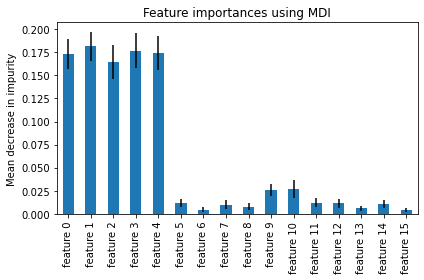

In [20]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
## we check the models 

In [21]:
classifiers = [
    LogisticRegression(),
    LogisticRegression(penalty = 'l2'),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 59.3453%
Log Loss: 0.6904395852006908
LogisticRegression
****Results****
Accuracy: 59.3453%
Log Loss: 0.6904395852006908
KNeighborsClassifier
****Results****
Accuracy: 51.2144%
Log Loss: 4.958961971664185
SVC
****Results****
Accuracy: 59.3453%
Log Loss: 0.6769520228676437
DecisionTreeClassifier
****Results****
Accuracy: 55.0158%
Log Loss: 15.502163235221703
RandomForestClassifier
****Results****
Accuracy: 64.0971%
Log Loss: 0.6493248073330155
AdaBoostClassifier
****Results****
Accuracy: 61.6684%
Log Loss: 0.690290780616292
GradientBoostingClassifier
****Results****
Accuracy: 63.2524%
Log Loss: 0.6361119436636259
GaussianNB
****Results****
Accuracy: 58.6061%
Log Loss: 0.6843712184399379
LinearDiscriminantAnalysis
****Results****
Accuracy: 62.7244%
Log Loss: 0.6419351980500961
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 56.1774%
Log Loss: 1.9873641605067311


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


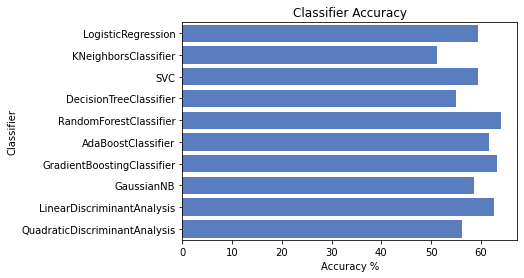

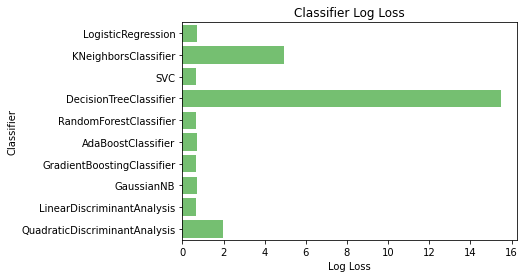

In [22]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [23]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.179668)
2. feature 4 (0.177996)
3. feature 3 (0.176345)
4. feature 0 (0.172608)
5. feature 2 (0.165531)
6. feature 10 (0.025671)


### Predictions

Accuracy of the GBM on test set: 0.634
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       562
           1       0.56      0.46      0.50       385

    accuracy                           0.63       947
   macro avg       0.62      0.61      0.61       947
weighted avg       0.63      0.63      0.63       947



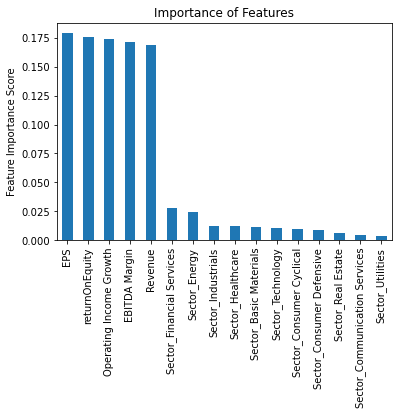

In [25]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model.score(X_test, y_test)))
pred=model.predict(X_test)
print(classification_report(y_test, pred))

In [26]:
y_pred_prob = model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.6548874612931552


In [ ]:
##Good prediction, better than random

In [ ]:
#Hyperparameter search takes too long with RandomForest()